In [8]:
import torch
import torchvision
import torch.nn as nn
import torchvision.datasets as datasets
from torch.utils.data import DataLoader
import numpy as np
import matplotlib.pyplot as plt
import torch.nn.functional as F
import torchvision.transforms as transform

In [9]:
transform = transform.Compose([transform.ToTensor(),transform.Resize((128,128))])

In [10]:
data=datasets.ImageFolder(root="C:\\Users\\sadhu\\OneDrive\\Desktop\\research on ml\\dataset\\Fish_Data\\images\\classified",transform=transform)

In [11]:
data_loader=DataLoader(data,30,shuffle=True)

torch.Size([30, 3, 128, 128])


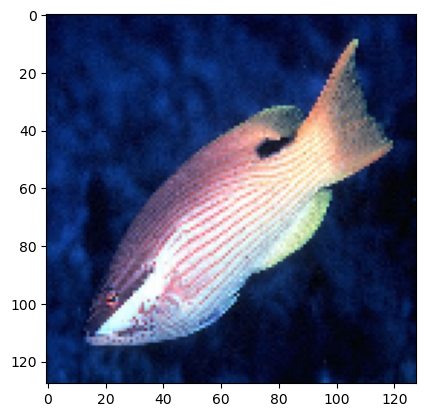

In [12]:
for i,l in data_loader:
    plt.imshow(i[0].squeeze().permute(1,2,0))
    print(i.size())
    break;

In [13]:
class one(nn.Module):
    def __init__(self):
        super().__init__()
        self.c1=nn.Conv2d(3,10,kernel_size=(3,3),stride=1,padding=1)
        self.r=nn.ReLU()
        self.m=nn.MaxPool2d((2,2))
        self.b1=nn.BatchNorm2d(10)
        
        
        
        self.c2=nn.Conv2d(10,25,kernel_size=(3,3),stride=1,padding=1)
        self.b2=nn.BatchNorm2d(25)
        
        
        self.c3=nn.Conv2d(25,100,kernel_size=(3,3),stride=1,padding=1)
        self.b3=nn.BatchNorm2d(100)
        
        
        self.c4=nn.Conv2d(100,250,kernel_size=(3,3),stride=1,padding=1)
        
        self.l=nn.Linear(250*8*8,1000)
        self.l2=nn.Linear(1000,679)
    def forward(self,x):
        self.out=self.c1(x)
        self.out=self.b1(self.out)
        self.out=self.r(self.out)
        self.out=self.m(self.out)
        
        self.out=self.c2(self.out)
        self.out=self.b2(self.out)
        self.out=self.r(self.out)
        self.out=self.m(self.out)
        
        self.out=self.c3(self.out)
        self.out=self.b3(self.out)
        self.out=self.r(self.out)
        self.out=self.m(self.out)
        
        self.out=self.c4(self.out)
        self.out=self.r(self.out)
        self.out=self.m(self.out)
       
        self.out=self.out.view(-1,8*8*250)
        self.out=self.l(self.out)
        self.out=self.l2(self.out)
        return self.out
        

In [14]:
device=torch.device("cpu") if torch.cuda.is_available() else "cpu"

In [15]:
model=one().to(device)

In [16]:
loss=nn.functional.cross_entropy
opt=torch.optim.Adam(model.parameters(),0.0001)

In [18]:
for epoch in range(10):
    for i,l in data_loader:
        i,l=i.to(device),l.to(device)
        opt.zero_grad()
        o=model(i)
        l=loss(o,l)
        l.backward()
        opt.step()
    print(epoch)

0
1
2
3
4
5
6
7
8
9


In [19]:
device

device(type='cpu')

In [20]:
for i,l in data_loader:
    i,l=i.to(device),l.to(device)
    o=model(i)
    o=F.softmax(o,dim=1)
    i=[]
    for x in o:
        i.append(x.data.numpy().argmax())
#     index=o.data.numpy().argmax()
    i=np.array(i)
    ans=0
    for x in range(30):
        if(i[x]==l[x]):
            ans+=1
    print(ans/30*100)
    break

93.33333333333333


In [71]:
array=['A73EGS-P',
 'A73EGSP',
 'acanthaluteres_brownii',
 'acanthaluteres_spilomelanurus',
 'acanthaluteres_vittiger',
 'acanthistius_cinctus',
 'acanthistius_cinctus_',
 'acanthopagrus _latus',
 'acanthopagrus_australis',
 'acanthopagrus_berda',
 'acanthopagrus_berda_',
 'achoerodus_gouldii',
 'achoerodus_viridis',
 'acreichthys_tomentosus',
 'aesopia_cornuta',
 'aethaloperca_rogaa',
 'aethaloperca_rogaa_',
 'alectis_ciliaris',
 'alectis_indica',
 'alepes_kleinii',
 'aluterus_monoceros',
 'aluterus_monoceros_',
 'aluterus_scriptus',
 'aluterus_scriptus_',
 'amanses_scopas',
 'amanses_scopas_',
 'anampses_caeruleopunctatus',
 'anampses_caeruleopunctatus_',
 'anampses_elegans',
 'anampses_femininus',
 'anampses_geographicus',
 'anampses_lennardi',
 'anampses_melanurus',
 'anampses_meleagrides',
 'anampses_meleagrides_',
 'anampses_neoguinaicus',
 'anampses_twistii',
 'anampses_twistii_',
 'anodontostoma_chacunda',
 'anyperodon_leucogrammicus',
 'anyperodon_leucogrammicus_',
 'aphareus_furca',
 'aphareus_furca_',
 'aphareus_rutilans',
 'aphareus_rutilans_',
 'aprion_virescens',
 'argyrops_spinifer',
 'argyrops_spinifer_',
 'aseraggodes_melanostictus',
 'atractoscion_aequidens',
 'atule_mate',
 'auxis_rochei',
 'auxis_thazard',
 'bathylagichthys_greyae',
 'beryx_decadactylus',
 'bodianus_anthioides',
 'bodianus_anthioides_',
 'bodianus_axillaris',
 'bodianus_axillaris_',
 'bodianus_bilunulatus',
 'bodianus_bilunulatus_',
 'bodianus_bimaculatus',
 'bodianus_bimaculatus_',
 'bodianus_diana',
 'bodianus_diana_',
 'bodianus_loxozonus',
 'bodianus_loxozonus_',
 'bodianus_mesothorax',
 'bodianus_mesothorax_',
 'bodianus_perditio',
 'bodianus_unimaculatus',
 'bodianus_vulpinus',
 'bothus_mancus',
 'bothus_mancus_',
 'bothus_myriaster',
 'bothus_pantherinus',
 'bothus_pantherinus_',
 'brachaluteres_jacksonianus',
 'brachirus_orientalis',
 'caesioperca_lepidopterus',
 'cantherhines_dumerilii',
 'cantherhines_dumerilii_',
 'cantherhines_fronticinctus',
 'cantherhines_fronticinctus_',
 'cantherhines_pardalis',
 'cantherhines_pardalis_',
 'cantheschenia_grandisquamis',
 'caprodon_longimanus',
 'caprodon_schlegelii',
 'carangoides_caeruleopinnatus',
 'carangoides_caeruleopinnatus_',
 'carangoides_chrysophrys',
 'carangoides_equula',
 'carangoides_ferdau',
 'carangoides_fulvoguttatus',
 'carangoides_fulvoguttatus_',
 'carangoides_hedlandensis',
 'carangoides_malabaricus',
 'carangoides_orthogrammus',
 'carangoides_orthogrammus_',
 'carangoides_plagiotaenia',
 'caranx_ignobilis',
 'caranx_ignobilis_',
 'caranx_lugubris',
 'caranx_melampygus',
 'caranx_melampygus_',
 'caranx_sexfasciatus',
 'caranx_sexfasciatus_',
 'carcharhinus_albimarginatus',
 'carcharhinus_amblyrhynchos',
 'carcharhinus_amblyrhynchos_',
 'carcharhinus_falciformis',
 'carcharhinus_galapagensis',
 'carcharhinus_limbatus',
 'carcharhinus_limbatus_',
 'carcharhinus_melanopterus',
 'carcharhinus_melanopterus_',
 'carcharhinus_obscurus',
 'carcharhinus_plumbeus',
 'carcharhinus_sorrah',
 'centroberyx_affinis',
 'centrogenys_vaigiensis',
 'centroscymnus_coelolepis',
 'cephalopholis_argus',
 'cephalopholis_argus_',
 'cephalopholis_boenak',
 'cephalopholis_boenak_',
 'cephalopholis_cyanostigma',
 'cephalopholis_cyanostigma_',
 'cephalopholis_formosa',
 'cephalopholis_igarashiensis',
 'cephalopholis_leopardus',
 'cephalopholis_leopardus_',
 'cephalopholis_microprion',
 'cephalopholis_miniata',
 'cephalopholis_miniata_',
 'cephalopholis_sexmaculata',
 'cephalopholis_sexmaculata_',
 'cephalopholis_sonnerati',
 'cephalopholis_sonnerati_',
 'cephalopholis_spiloparaea',
 'cephalopholis_spiloparaea_',
 'chascanopsetta_lugubris',
 'cheilinus_chlorourus',
 'cheilinus_chlorourus_',
 'cheilinus_fasciatus',
 'cheilinus_oxycephalus',
 'cheilinus_oxycephalus_',
 'cheilinus_trilobatus',
 'cheilinus_trilobatus_',
 'cheilinus_undulatus',
 'cheilio_inermis',
 'cheilio_inermis_',
 'cheilodactylus_ephippium',
 'cheilodactylus_fuscus',
 'cheilodactylus_spectabilis',
 'cheilodactylus_vestitus',
 'chelidonichthys_kumu',
 'chirocentrus_dorab',
 'chirocentrus_nudus',
 'choerodon_anchorago',
 'choerodon_anchorago_',
 'choerodon_cauteroma',
 'choerodon_cyanodus',
 'choerodon_fasciatus',
 'choerodon_fasciatus_',
 'choerodon_graphicus',
 'choerodon_jordani',
 'choerodon_rubescens',
 'choerodon_schoenleinii',
 'choerodon_schoenleinii_',
 'choerodon_venustus',
 'choerodon_vitta',
 'choerodon_zamboangae',
 'chromileptes_altivelis',
 'chromileptes_altivelis_',
 'cirrhilabrus_bathyphilus',
 'cirrhilabrus_condei',
 'cirrhilabrus_cyanopleura',
 'cirrhilabrus_cyanopleura_',
 'cirrhilabrus_exquisitus',
 'cirrhilabrus_exquisitus_',
 'cirrhilabrus_laboutei',
 'cirrhilabrus_punctatus',
 'cirrhilabrus_punctatus_',
 'cirrhilabrus_scottorum',
 'cirrhilabrus_scottorum_',
 'cirrhilabrus_temminckii',
 'coris_aygula',
 'coris_aygula_',
 'coris_batuensis',
 'coris_batuensis_',
 'coris_bulbifrons',
 'coris_caudimacula',
 'coris_caudimacula_',
 'coris_dorsomacula',
 'coris_dorsomacula_',
 'coris_gaimard',
 'coris_picta',
 'coris_pictoides',
 'coris_sandeyeri',
 'crenimugil_crenilabis',
 'CUNWCB-Y',
 'cymbacephalus_nematophthalmus',
 'cymolutes_praetextatus',
 'cymolutes_torquatus',
 'cynoglossus_puncticeps',
 'cyttopsis_rosea',
 'dactylophora_nigricans',
 'decapterus_macrosoma',
 'decapterus_russelli',
 'diproctacanthus_xanthurus',
 'dotalabrus_aurantiacus',
 'elagatis_bipinnulata',
 'elagatis_bipinnulata_',
 'epibulus_insidiator',
 'epibulus_insidiator_',
 'epinephelus_areolatus',
 'epinephelus_areolatus_',
 'epinephelus_bleekeri',
 'epinephelus_chlorostigma',
 'epinephelus_coeruleopunctatus',
 'epinephelus_coeruleopunctatus_',
 'epinephelus_coioides',
 'epinephelus_coioides_',
 'epinephelus_corallicola',
 'epinephelus_corallicola_',
 'epinephelus_cyanopodus',
 'epinephelus_cyanopodus_',
 'epinephelus_epistictus',
 'epinephelus_fasciatus',
 'epinephelus_fasciatus_',
 'epinephelus_fuscoguttatus',
 'epinephelus_fuscoguttatus_',
 'epinephelus_hexagonatus',
 'epinephelus_hexagonatus_',
 'epinephelus_howlandi',
 'epinephelus_lanceolatus',
 'epinephelus_latifasciatus',
 'epinephelus_macrospilos',
 'epinephelus_maculatus',
 'epinephelus_maculatus_',
 'epinephelus_melanostigma',
 'epinephelus_merra',
 'epinephelus_merra_',
 'epinephelus_morrhua',
 'epinephelus_multinotatus',
 'epinephelus_ongus',
 'epinephelus_ongus_',
 'epinephelus_polyphekadion',
 'epinephelus_polyphekadion_',
 'epinephelus_quoyanus',
 'epinephelus_quoyanus_',
 'epinephelus_radiatus',
 'epinephelus_retouti',
 'epinephelus_rivulatus',
 'epinephelus_rivulatus_',
 'epinephelus_sexfasciatus',
 'epinephelus_spilotoceps',
 'epinephelus_tauvina',
 'epinephelus_tauvina_',
 'epinephelus_undulatostriatus',
 'etelis_carbunculus',
 'etelis_carbunculus_',
 'etelis_coruscans',
 'eubalichthys_cyanoura',
 'eubalichthys_mosaicus',
 'eupetrichthys_angustipes',
 'euthynnus_affinis',
 'evistias_acutirostris',
 'gempylus_serpens',
 'gnathanodon_speciosus',
 'gnathanodon_speciosus_',
 'gnathodentex_aureolineatus',
 'gnathodentex_aureolineatus_',
 'gracila_albomarginata',
 'gracila_albomarginata_',
 'gymnocranius_ microdon',
 'gymnocranius_audleyi',
 'gymnocranius_euanus',
 'gymnocranius_grandoculis',
 'gymnosarda_unicolor',
 'halichoeres_argus',
 'halichoeres_argus_',
 'halichoeres_biocellatus',
 'halichoeres_biocellatus_',
 'halichoeres_chloropterus',
 'halichoeres_chloropterus_',
 'halichoeres_chrysus',
 'halichoeres_hartzfeldii',
 'halichoeres_hartzfeldii_',
 'halichoeres_hortulanus',
 'halichoeres_hortulanus_',
 'halichoeres_leucurus',
 'halichoeres_margaritaceus',
 'halichoeres_margaritaceus_',
 'halichoeres_marginatus',
 'halichoeres_marginatus_',
 'halichoeres_melanochir',
 'halichoeres_melanochir_',
 'halichoeres_melanurus',
 'halichoeres_melanurus_',
 'halichoeres_melasmapomus',
 'halichoeres_miniatus',
 'halichoeres_nebulosus',
 'halichoeres_nigrescens',
 'halichoeres_nigrescens_',
 'halichoeres_scapularis',
 'halichoeres_scapularis_',
 'halichoeres_trimaculatus',
 'halichoeres_trimaculatus_',
 'harriotta_raleighana',
 'hemigymnus_fasciatus',
 'hemigymnus_fasciatus_',
 'hemigymnus_melapterus',
 'hemigymnus_melapterus_',
 'hemiramphus_far',
 'herklotsichthys_quadrimaculatus',
 'hologymnosus_annulatus',
 'hologymnosus_annulatus_',
 'hologymnosus_doliatus',
 'hologymnosus_doliatus_',
 'hyporhamphus_affinis',
 'hyporhamphus_dussumieri',
 'inegocia_japonica',
 'Istiophorus_platypterus',
 'johnius_borneensis',
 'katsuwonus_pelamis',
 'labrichthys_unilineatus',
 'labrichthys_unilineatus_',
 'labroides_bicolor',
 'labroides_dimidiatus',
 'labroides_dimidiatus_',
 'labroides_pectoralis',
 'labropsis_australis',
 'labropsis_manabei',
 'labropsis_xanthonota',
 'latridopsis_forsteri',
 'lepidocybium_flavobrunneum',
 'leptojulis_cyanopleura',
 'leptojulis_cyanopleura_',
 'lethrinus_amboinensis',
 'lethrinus_atkinsoni',
 'lethrinus_erythracanthus',
 'lethrinus_genivittatus',
 'lethrinus_harak',
 'lethrinus_harak_',
 'lethrinus_lentjan',
 'lethrinus_lentjan_',
 'lethrinus_microdon',
 'lethrinus_microdon_',
 'lethrinus_miniatus',
 'lethrinus_miniatus_',
 'lethrinus_nebulosus',
 'lethrinus_nebulosus_',
 'lethrinus_obsoletus',
 'lethrinus_obsoletus_',
 'lethrinus_olivaceus',
 'lethrinus_olivaceus_',
 'lethrinus_ornatus',
 'lethrinus_rubrioperculatus',
 'lethrinus_rubrioperculatus_',
 'lethrinus_semicinctus',
 'lethrinus_variegatus',
 'lethrinus_xanthochilus',
 'liopropoma_mitratum',
 'liopropoma_susumi',
 'liopropoma_susumi_',
 'liza_subviridis',
 'liza_vaigiensis',
 'lniistius_aneitensis',
 'lniistius_aneitensis_',
 'lniistius_pavo',
 'lutjanus_adetii',
 'lutjanus_argentimaculatus',
 'lutjanus_argentimaculatus_',
 'lutjanus_biguttatus',
 'lutjanus_biguttatus_',
 'lutjanus_bohar',
 'lutjanus_bohar_',
 'lutjanus_carponotatus',
 'lutjanus_carponotatus_',
 'lutjanus_decussatus',
 'lutjanus_decussatus_',
 'lutjanus_ehrenbergii',
 'lutjanus_erythropterus',
 'lutjanus_fulviflamma',
 'lutjanus_fulviflamma_',
 'lutjanus_fulvus',
 'lutjanus_fulvus_',
 'lutjanus_gibbus',
 'lutjanus_gibbus_',
 'lutjanus_johnii',
 'lutjanus_kasmira',
 'lutjanus_kasmira_',
 'lutjanus_lemniscatus',
 'lutjanus_lutjanus',
 'lutjanus_lutjanus_',
 'lutjanus_malabaricus',
 'lutjanus_malabaricus_',
 'lutjanus_monostigma',
 'lutjanus_monostigma_',
 'lutjanus_quinquelineatus',
 'lutjanus_quinquelineatus_',
 'lutjanus_rivulatus',
 'lutjanus_rivulatus_',
 'lutjanus_russellii',
 'lutjanus_russellii_',
 'lutjanus_sebae',
 'lutjanus_sebae_',
 'lutjanus_semicinctus',
 'lutjanus_semicinctus_quoy',
 'lutjanus_timoriensis',
 'lutjanus_vitta',
 'macolor_macularis',
 'macolor_macularis_',
 'macolor_niger',
 'macolor_niger_',
 'macropharyngodon_choati',
 'macropharyngodon_kuiteri',
 'macropharyngodon_kuiteri_',
 'macropharyngodon_meleagris',
 'macropharyngodon_meleagris_',
 'macropharyngodon_negrosensis',
 'macropharyngodon_ornatus',
 'megalaspis_cordyla',
 'meuschenia_australis',
 'meuschenia_freycineti',
 'meuschenia_freycineti_',
 'meuschenia_galii',
 'meuschenia_hippocrepis',
 'meuschenia_scaber',
 'meuschenia_trachylepis',
 'monacanthus_chinensis',
 'monacanthus_chinensis_',
 'monotaxis_grandoculis',
 'monotaxis_grandoculis_',
 'mugim_cephalus',
 'naucrates_ductor',
 'negaprion_acutidens',
 'nemadactylus_douglasii',
 'nemipterus_furcosus',
 'nemipterus_furcosus_',
 'nemipterus_hexodon',
 'nemipterus_peronii',
 'netuma_thalassina',
 'nibea_soldado',
 'notolabrus_fucicola',
 'notolabrus_gymnogenis',
 'notolabrus_tetricus',
 'notorynchus_cepedianus',
 'novaculichthys_taeniourus',
 'novaculichthys_taeniourus_',
 'novaculoides_macrolepidotus',
 'novaculoides_macrolepidotus_',
 'oedalechilus_labiosus',
 'ophthalmolepis_lineolatus',
 'ophthalmolepis_lineolatus_',
 'otolithes_ruber',
 'oxycheilinus_bimaculatus',
 'oxycheilinus_bimaculatus_',
 'oxycheilinus_celebicus',
 'oxycheilinus_celebicus_',
 'oxycheilinus_digrammus',
 'oxycheilinus_unifasciatus',
 'oxymonacanthus_longirostris',
 'oxymonacanthus_longirostris_',
 'P1ROZC-Z',
 'P1ROZC-Z_',
 'pagrus_auratus',
 'paracaesio_kusakarii',
 'paracheilinus_filamentosus',
 'paraluteres_prionurus',
 'paraluteres_prionurus_',
 'paramonacanthus_choirocephalus',
 'paraplagusia_bilineata',
 'parastromateus_niger',
 'pardachirus_hedleyi',
 'pardachirus_pavoninus',
 'pentapodus_aureofasciatus',
 'pentapodus_paradiseus',
 'pentapodus_vitta_quoy',
 'pervagor_alternans',
 'pervagor_aspricaudus',
 'pervagor_aspricaudus_',
 'pervagor_janthinosoma',
 'pervagor_janthinosoma_',
 'pervagor_melanocephalus',
 'pervagor_melanocephalus_',
 'pervagor_nigrolineatus',
 'pinjalo_lewisi',
 'platycephalus_indicus',
 'plectranthias_longimanus',
 'plectranthias_longimanus_',
 'plectranthias_nanus',
 'plectranthias_nanus_',
 'plectranthias_winniensis',
 'plectropomus_areolatus',
 'plectropomus_laevis',
 'plectropomus_laevis_',
 'plectropomus_leopardus',
 'plectropomus_leopardus_',
 'plectropomus_maculatus',
 'plectropomus_oligacanthus',
 'plotosus_lineatus',
 'plotosus_lineatus_',
 'PQV7DP-S',
 'pristipomoides_argyrogrammicus',
 'pristipomoides_auricilla',
 'pristipomoides_filamentosus',
 'pristipomoides_filamentosus_',
 'pristipomoides_flavipinnis',
 'pristipomoides_sieboldii',
 'pristipomoides_zonatus',
 'promethichthys_prometheus',
 'protonibea_diacanthus',
 'psettodes_erumei',
 'pseudalutarius_nasicornis',
 'pseudalutarius_nasicornis_',
 'pseudanthias_bicolor',
 'pseudanthias_bicolor_',
 'pseudanthias_cooperi',
 'pseudanthias_cooperi_',
 'pseudanthias_dispar',
 'pseudanthias_dispar_',
 'pseudanthias_fasciatus',
 'pseudanthias_huchtii',
 'pseudanthias_hypselosoma',
 'pseudanthias_hypselosoma_',
 'pseudanthias_lori',
 'pseudanthias_luzonensis',
 'pseudanthias_pictilis',
 'pseudanthias_pictilis_',
 'pseudanthias_pleurotaenia',
 'pseudanthias_pleurotaenia_',
 'pseudanthias_rubrizonatus',
 'pseudanthias_rubrizonatus_',
 'pseudanthias_sheni',
 'pseudanthias_sheni_',
 'pseudanthias_smithvanizi',
 'pseudanthias_squamipinnis',
 'pseudanthias_squamipinnis_',
 'pseudanthias_tuka',
 'pseudanthias_tuka_',
 'pseudanthias_ventralis',
 'pseudanthias_ventralis_',
 'pseudocaranx_dentex',
 'pseudocaranx_dentex_',
 'pseudocarcharias_kamoharai',
 'pseudocheilinus_evanidus',
 'pseudocheilinus_evanidus_',
 'pseudocheilinus_hexataenia',
 'pseudocheilinus_hexataenia_',
 'pseudocheilinus_ocellatus',
 'pseudocheilinus_octotaenia',
 'pseudocheilinus_octotaenia_',
 'pseudodax_moluccanus',
 'pseudodax_moluccanus_',
 'pseudojuloides_cerasinus',
 'pseudolabrus_biserialis',
 'pseudolabrus_guentheri',
 'pseudolabrus_guentheri_',
 'pseudolabrus_luculentus',
 'pseudolabrus_luculentus_',
 'pseudorhombus_argus',
 'pseudorhombus_arsius',
 'pseudorhombus_elevatus',
 'pteragogus_cryptus',
 'pteragogus_cryptus_',
 'pteragogus_enneacanthus',
 'pteragogus_flagellifer',
 'rastrelliger_kanagurta',
 'retropinna_semoni',
 'rhabdosargus_sarba',
 'rhincodon_typus',
 'rhizoprionodon_acutus',
 'ruvettus_pretiosus',
 'samariscus_triocellatus',
 'samaris_cristatus',
 'sarda_orientalis',
 'sardinella_albella',
 'sardinella_gibbosa',
 'sardinops_sagax',
 'scaevius_milii',
 'scolopsis_affinis',
 'scolopsis_affinis_',
 'scolopsis_bilineata',
 'scolopsis_bilineata_',
 'scolopsis_lineata',
 'scolopsis_margaritifer',
 'scolopsis_monogramma',
 'scolopsis_monogramma_',
 'scolopsis_trilineata',
 'scolopsis_vosmeri',
 'scolopsis_vosmeri_',
 'scolopsis_xenochrous',
 'scomberoides_commersonnianus',
 'scomberoides_lysan',
 'scomberomorus_commerson',
 'scomberomorus_commerson_',
 'selaroides_leptolepis',
 'selar_crumenophthalmus',
 'seriola_dumerili',
 'seriola_hippos',
 'seriola_rivoliana',
 'seriola_rivoliana_',
 'seriolina_nigrofasciata',
 'serranocirrhitus_latus',
 'sillago_ciliata',
 'sillago_sihama',
 'sillago_sihama_',
 'soleichthys_heterorhinos',
 'sphyraena_barracuda',
 'sphyraena_forsteri',
 'sphyraena_forsteri_',
 'sphyraena_jello',
 'sphyraena_obtusata',
 'sphyraena_obtusata_',
 'stegostoma_fasciatum',
 'stethojulis_bandanensis',
 'stethojulis_bandanensis_',
 'stethojulis_interrupta',
 'stethojulis_interrupta_',
 'stethojulis_strigiventer',
 'stethojulis_strigiventer_',
 'stethojulis_trilineata',
 'stethojulis_trilineata_',
 'stolephorus_waitei',
 'suezichthys_arquatus',
 'suezichthys_cyanolaemus',
 'suezichthys_gracilis',
 'suezichthys_gracilis_',
 'symphorichthys_spilurus',
 'symphorus_nematophorus',
 'thalassoma_amblycephalum',
 'thalassoma_amblycephalum_',
 'thalassoma_hardwicke',
 'thalassoma_hardwicke_',
 'thalassoma_jansenii',
 'thalassoma_jansenii_',
 'thalassoma_lunare',
 'thalassoma_lunare_',
 'thalassoma_lutescens',
 'thalassoma_lutescens_',
 'thalassoma_nigrofasciatum',
 'thalassoma_purpureum',
 'thalassoma_purpureum_',
 'thalassoma_quinquevittatum',
 'thalassoma_quinquevittatum_',
 'thalassoma_trilobatum',
 'thalassoma_trilobatum_',
 'thryssa_baelama',
 'thryssa_hamiltonii',
 'thunnus_alalunga',
 'thunnus_albacares',
 'thysanophrys_celebica',
 'thysanophrys_chiltonae',
 'trachichthys_australis',
 'trachinotus_baillonii',
 'trachinotus_blochii',
 'trachinotus_blochii_',
 'trachinotus_botla',
 'trachypoma_macracanthus',
 'triaenodon_obesus',
 'uraspis_secunda',
 'valamugil_cunnesius',
 'valamugil_engeli',
 'valamugil_seheli',
 'variola_albimarginata',
 'variola_albimarginata_',
 'variola_louti',
 'variola_louti_',
 'wattsia_mossambica',
 'wetmorella_albofasciata',
 'wetmorella_nigropinnata',
 'wetmorella_nigropinnata_',
 'xiphocheilus_typus',
 'zenarchopterus_dispar',
 'zeus_faber']

In [72]:
array.sort()

lutjanus_rivulatus_
lutjanus_rivulatus_


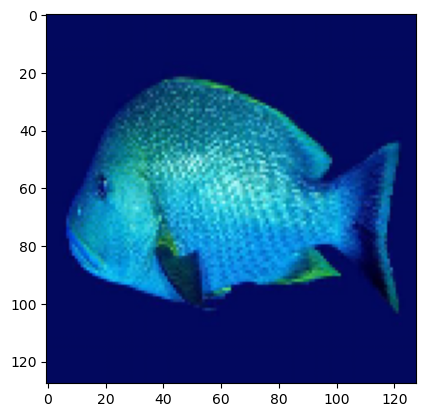

In [104]:
for i,l in data_loader:
    plt.imshow(i[0].squeeze().permute(1,2,0))
    o=model(i[0:1])
    print(array[o[0].data.numpy().argmax()])
    print(array[l[0]])
    break

In [ ]:
torch.save(model,"Fish_classification")

In [70]:
m1=torch.load("Fish_classification")